In [2]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import re

import json

In [11]:
!pip install pyarrow

     |████████████████████████████████| 25.6 MB 4.7 MB/s            


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### ConversationsFromUniversities refers to tweets posted by Universities under observation
### ConversationsMentioningUniversities refers to tweets mentioning those Universities 

In [16]:
ConversationsFromUniversities= pd.concat(map(pd.read_feather, glob.glob('../DataStore/ConversationsFromUniversities*.ftr')),ignore_index=True)

In [17]:
ConversationsMentioningUniversities= pd.concat(map(pd.read_feather, glob.glob('../DataStore/ConversationsMentioningUniversities*.ftr')),ignore_index=True)

#### We transform time-related columms to pandas datetime format

In [18]:
ConversationsFromUniversities['created_at']=pd.to_datetime(ConversationsFromUniversities['created_at'])
ConversationsFromUniversities['collection_timestamp']=pd.to_datetime(ConversationsFromUniversities['created_at']).dt.strftime('%Y-%m-%d')

In [19]:
ConversationsMentioningUniversities['created_at']=pd.to_datetime(ConversationsMentioningUniversities['created_at'])
ConversationsMentioningUniversities['collection_timestamp']=pd.to_datetime(ConversationsMentioningUniversities['created_at']).dt.strftime('%Y-%m-%d')

In [10]:
UniversityMetrics= pd.concat(map(pd.read_feather, glob.glob('../DataStore/UniversityMetrics/*.ftr')),ignore_index=True)
UniversityMetrics['collection_timestamp']=pd.to_datetime(UniversityMetrics['collection_timestamp'], utc=True).dt.strftime('%Y-%m-%d')
UniversityMetricsResolver=UniversityMetrics.drop_duplicates(subset=['user.screen_name','user.id'])

In [11]:
UniversityMetrics

,user.screen_name,user.followers_count,user.favourites_count,user.friends_count,user.statuses_count,user.id,collection_timestamp
0,IEuniversity,15610,3041,755,7636,16825188,2021-12-23
1,imperialcollege,147637,18706,3351,20977,15353955,2021-12-23
2,ucl,105250,4799,932,5486,322601789,2021-12-23
3,uclnews,54551,458,2230,11872,40234732,2021-12-23
4,UCLEvents,17289,415,472,3989,418725314,2021-12-23
...,...,...,...,...,...,...,...
91,uclnews,54570,458,2230,11872,40234732,2021-12-28
92,UCLEvents,17288,415,472,3989,418725314,2021-12-28
93,MIT,1181344,1539,564,20579,15460048,2021-12-28
94,Stanford,876303,72,539,20614,18036441,2021-12-28


## Social Media Insights
### SMI1-4: Community on social media

In [12]:
SMI1Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.followers_count')

In [13]:
SMI1Visualization

collection_timestamp,2021-12-20,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2022-01-06,2022-01-10
user.screen_name,,,,,,,,,,,,
IEuniversity,15610,15610,15610,15616,15616,15618,15623,15623,15625,15625,15642,15666
MIT,1180408,1180411,1180411,1180488,1180704,1180869,1181344,1181344,1181665,1181665,1183108,1183965
Stanford,875536,875531,875531,875633,875836,875947,876302,876303,876618,876618,877874,878703
UCLEvents,17289,17289,17289,17292,17290,17287,17288,17288,17291,17291,17286,17292
UniofOxford,782702,782700,782700,782794,782969,783065,783475,783475,783780,783780,785078,785797
imperialcollege,147639,147637,147637,147656,147689,147727,147806,147806,147884,147884,148112,148219
ucl,105252,105250,105250,105272,105286,105297,105325,105325,105371,105371,105531,105630
uclnews,54552,54551,54551,54549,54552,54558,54570,54570,54594,54594,54637,54653


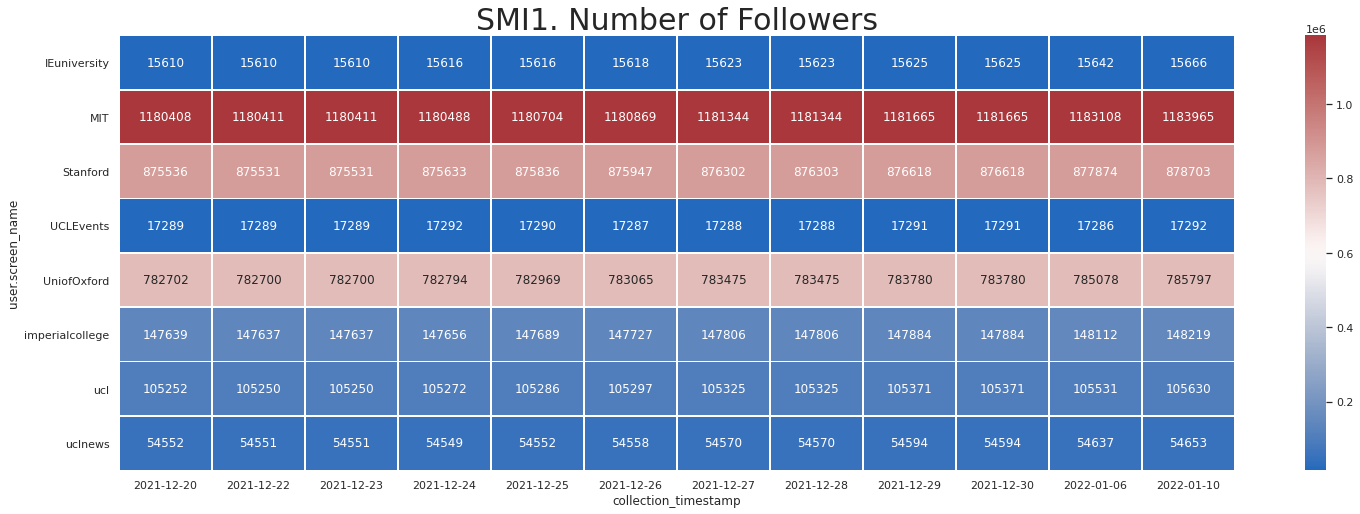

In [14]:
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI1Visualization, annot=True, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI1. Number of Followers",fontsize=30)

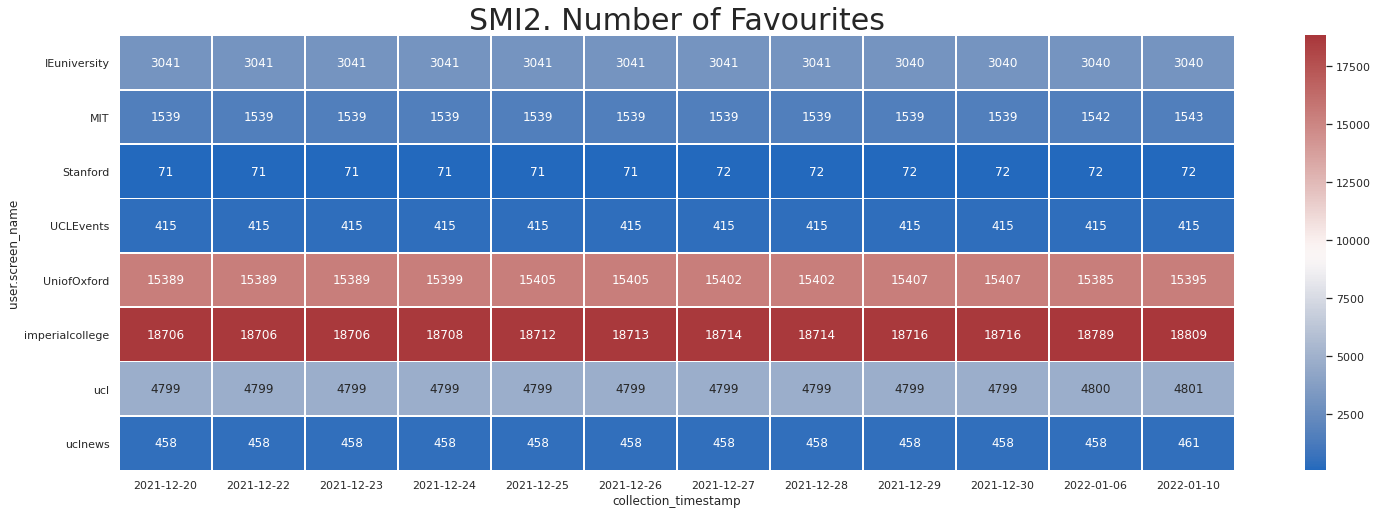

In [15]:
SMI2Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.favourites_count')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI2Visualization, annot=True, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI2. Number of Favourites",fontsize=30)

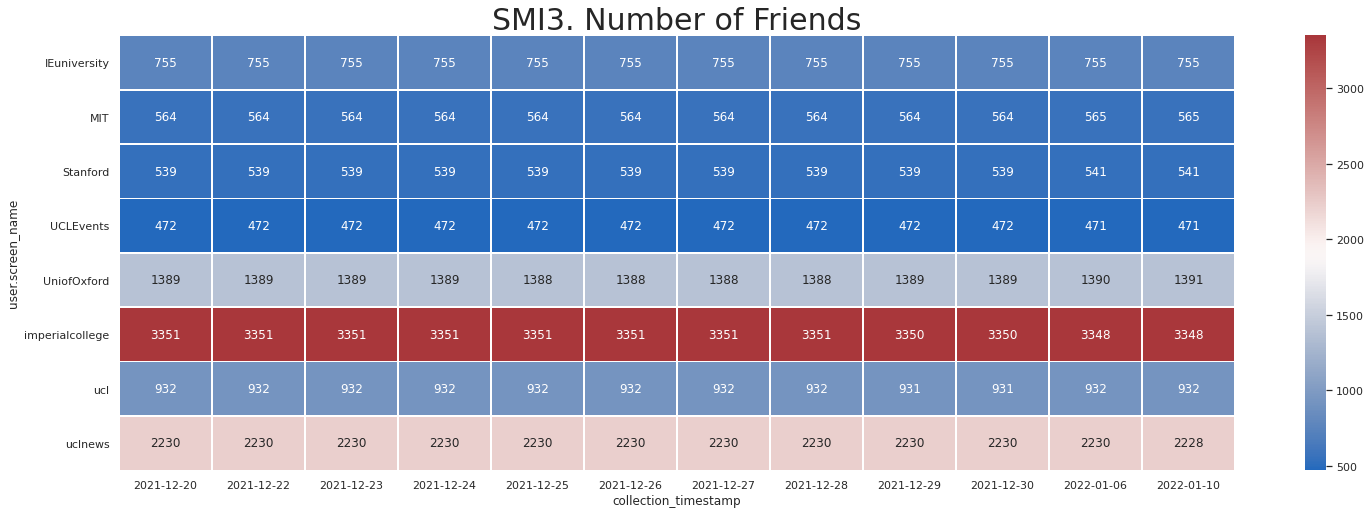

In [16]:
SMI3Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.friends_count')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI3Visualization, annot=True, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI3. Number of Friends",fontsize=30)

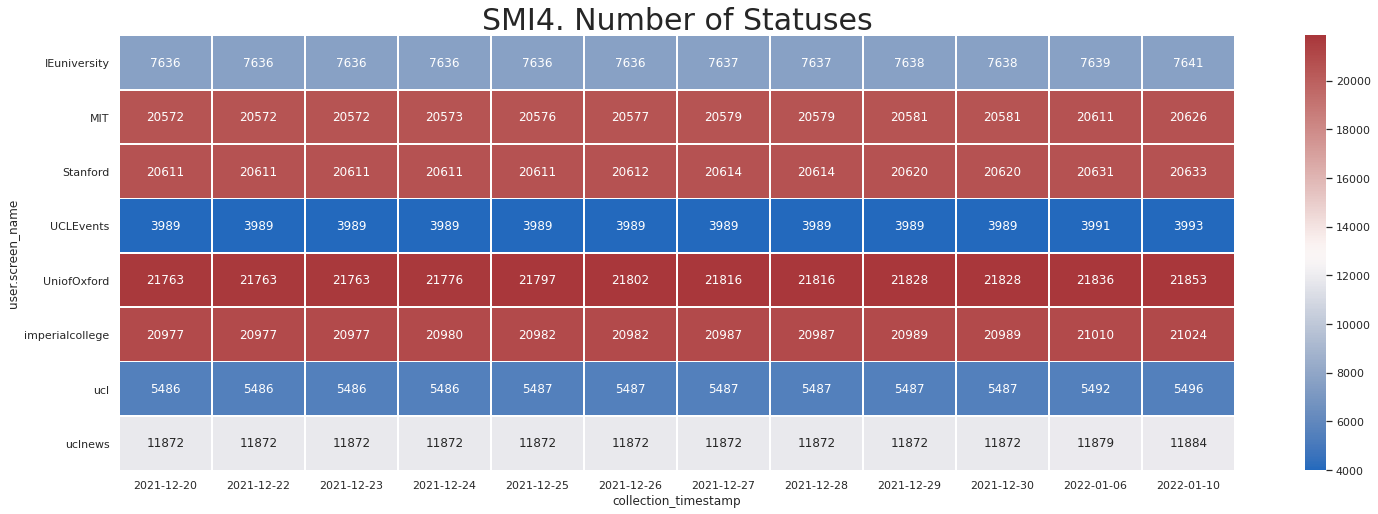

In [17]:
SMI4Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.statuses_count')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI4Visualization, annot=True, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI4. Number of Statuses",fontsize=30)

### SMI5-6: Engagement

In [18]:
SMI5=ConversationsFromUniversities[['created_at', 'author.name','lang']].groupby([pd.Grouper(key='created_at', freq='M'),'author.name']).count().reset_index()

In [19]:
SMI5['collection_timestamp']=pd.to_datetime(SMI5['created_at']).dt.strftime('%Y-%m-%d')


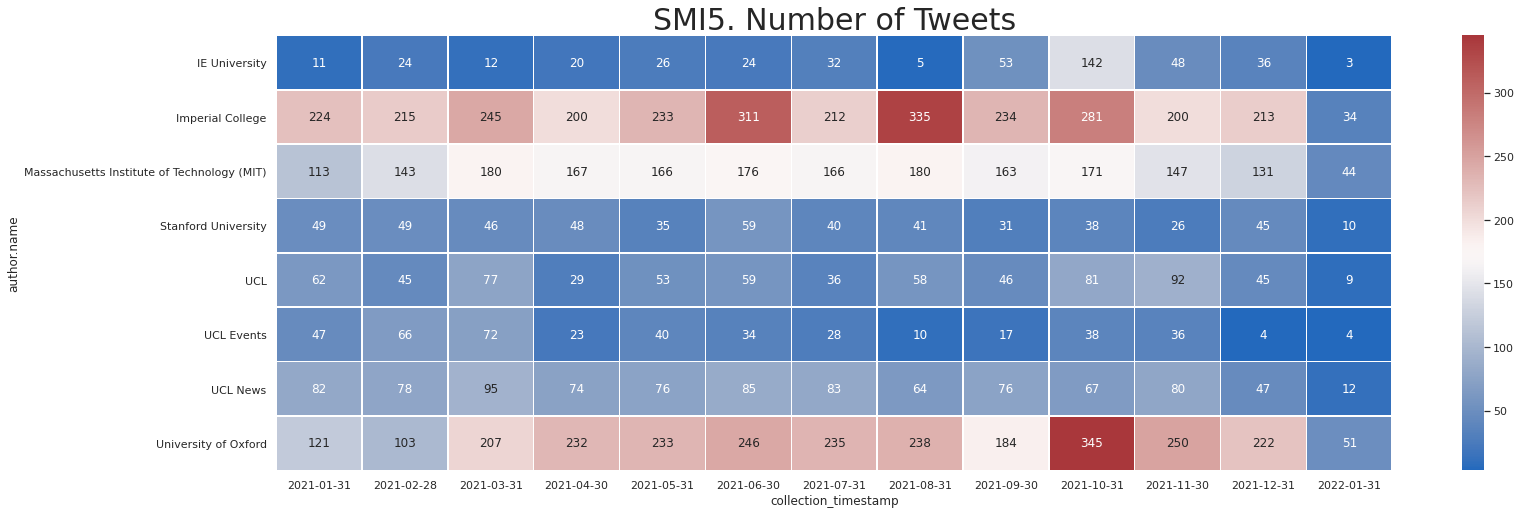

In [20]:
SMI5Visualization=SMI5.pivot(index='author.name',columns='collection_timestamp',values='lang')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI5Visualization, annot=True, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI5. Number of Tweets",fontsize=30)

### SMI6-7: Top Posts from Universities

In [21]:
indexesOfTopPosts=ConversationsFromUniversities.groupby('author.name')['public_metrics.retweet_count'].idxmax()

In [22]:
SMI6=ConversationsFromUniversities.iloc[indexesOfTopPosts]

In [23]:
SMI6['tweet.uri']=SMI6['id'].apply(lambda x: 'https://twitter.com/anyuser/status/'+ str(x))


In [24]:
SMI6Visualization=SMI6[['author.name','text','public_metrics.retweet_count','tweet.uri']]
SMI6Visualization

,author.name,text,public_metrics.retweet_count,tweet.uri
9174,IE University,"RT @AminaJMohammed: Signed, sealed and now to ...",50,https://twitter.com/anyuser/status/13740037019...
9197,Imperial College,#OnThisDay 1879: Scientist Maud Menten was bor...,397,https://twitter.com/anyuser/status/13731750126...
3297,Massachusetts Institute of Technology (MIT),RT @NobelPrize: BREAKING NEWS: \nThe 2021 Sver...,5954,https://twitter.com/anyuser/status/14475029022...
8806,Stanford University,RT @StanfordWBB: 𝐂𝐑𝐎𝐖𝐍 𝐓𝐇𝐄 𝐂𝐀𝐑𝐃𝐈𝐍𝐀𝐋 👑🌲\n\n#GoS...,1979,https://twitter.com/anyuser/status/13788627728...
9375,UCL,RT @NHSuk: If you have a health condition and ...,1322,https://twitter.com/anyuser/status/13714011390...
4319,UCL Events,RT @ucl: UCL has been ranked 8th best universi...,221,https://twitter.com/anyuser/status/14352062540...
3529,UCL News,RT @KensingtonRoyal: .@UCL's landmark ‘Childre...,506,https://twitter.com/anyuser/status/14453612945...
8314,University of Oxford,NEW: Oxford researchers find malaria vaccine i...,4653,https://twitter.com/anyuser/status/13855960009...


In [25]:
SMI7=ConversationsMentioningUniversities.sort_values(by='public_metrics.retweet_count',ascending=False)
SMI7['tweet.uri']=SMI7['id'].apply(lambda x: 'https://twitter.com/anyuser/status/'+ str(x))
SMI7.drop_duplicates(subset=['text'],inplace=True)
SMI7Visualization=SMI7[['author.name','text','public_metrics.retweet_count','tweet.uri']].head(20)

### SMI6-7: Top Posts mentioning Universities

In [26]:
SMI7Visualization

,author.name,text,public_metrics.retweet_count,tweet.uri
125052,Sergio Alvarado,RT @UniofOxford: Oxford’s Covid-19 vaccine pro...,26683,https://twitter.com/anyuser/status/14024364576...
17996,DΩrΩψhy-Jeαn Dαcquel InfαnψαdΩ .*,RT @DrSophieSmith: Oxford security makes a wom...,19973,https://twitter.com/anyuser/status/14647728136...
31899,Rohit_R,RT @UniofOxford: Today marks an important mile...,9730,https://twitter.com/anyuser/status/14631128771...
53395,ら～,RT @gijigae: これは日本でも拡散して欲しい。高校卒業しなくても、大学を出なくても...,7834,https://twitter.com/anyuser/status/14588433324...
62861,The Experts Are Lying,RT @xeni: I told the @nytimes everything. So d...,7128,https://twitter.com/anyuser/status/14575657432...
66134,Richard L. Bennett,"RT @h_jackson_: Thread: This semester at @MIT,...",5025,https://twitter.com/anyuser/status/14570388402...
121446,Vuvu,RT @UniofOxford: NEW: Oxford researchers find ...,4652,https://twitter.com/anyuser/status/14027853939...
103559,Iamlistening,RT @BorisJohnson: It is truly fantastic news -...,3162,https://twitter.com/anyuser/status/14066156176...
16772,Steph16300,"RT @DocteurGonzo4: Selon une étude du @MIT, ce...",2872,https://twitter.com/anyuser/status/14650157935...
17682,Meg van Kuyk🇳🇱💙#FBPE🇪🇺,RT @StefSimanowitz: @peterjukes @BorisJohnson ...,2736,https://twitter.com/anyuser/status/14648513792...


### SMI8-9: Social Media Amplification

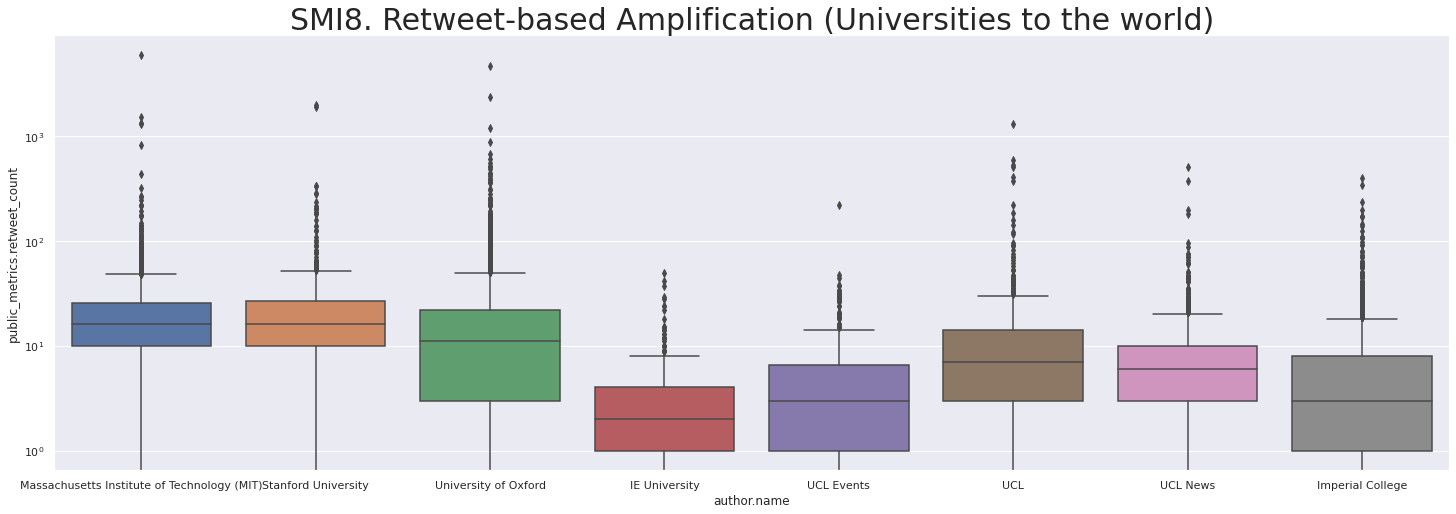

In [27]:
SMI8Visualization=ConversationsFromUniversities[['author.name','public_metrics.retweet_count']]
ax = sns.boxplot(x="author.name", y="public_metrics.retweet_count", data=SMI8Visualization).set_title("SMI8. Retweet-based Amplification (Universities to the world)",fontsize=30)
plt.yscale('log')

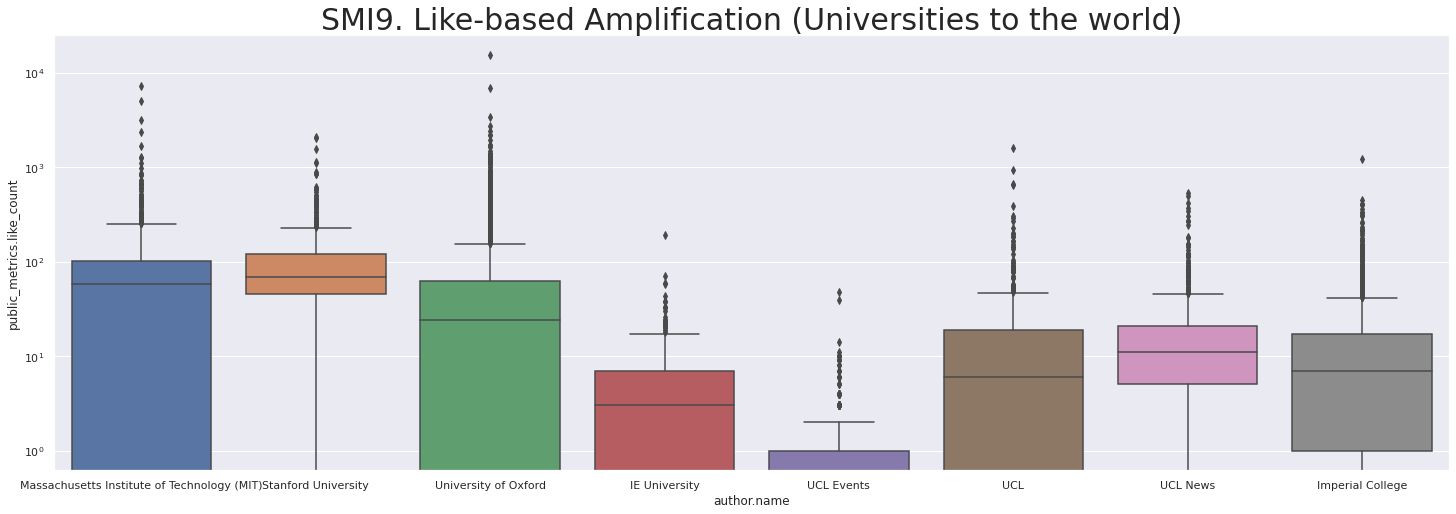

In [28]:
SMI9Visualization=ConversationsFromUniversities[['author.name','public_metrics.like_count']]
ax = sns.boxplot(x="author.name", y="public_metrics.like_count", data=SMI9Visualization).set_title("SMI9. Like-based Amplification (Universities to the world)",fontsize=30)
plt.yscale('log')

### SMI10-11: Top influencers.
#### An influencer is someone who mentions  a university and gets large levels of amplification

In [29]:
SMI10=ConversationsMentioningUniversities.sort_values(by='public_metrics.retweet_count',ascending=False)
SMI10['tweet.uri']=SMI10['id'].apply(lambda x: 'https://twitter.com/anyuser/status/'+ str(x))
SMI10.drop_duplicates(subset=['text'],inplace=True)


In [30]:
pd.set_option('display.max_rows', 100)
SMI10AmplifiedandIsRetweet=SMI10[(SMI10['public_metrics.retweet_count'] > SMI10['public_metrics.retweet_count'].quantile(.999))&SMI10['text'].str.startswith('RT')]

In [31]:
SMI10AmplifiedandIsRetweet

,lang,created_at,id,text,author_id,source,reply_settings,referenced_tweets,in_reply_to_user_id,conversation_id,...,attachments.poll_ids,attachments.poll.id,attachments.poll.voting_status,attachments.poll.end_datetime,attachments.poll.duration_minutes,attachments.poll.options,geo.coordinates.type,geo.coordinates.coordinates,collection_timestamp,tweet.uri
125052,en,2021-06-09 01:24:42+00:00,1402436457642536960,RT @UniofOxford: Oxford’s Covid-19 vaccine pro...,864340384381456385,Twitter for Android,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1402436457642536960,...,None,None,None,None,NaN,None,None,None,2021-06-09,https://twitter.com/anyuser/status/14024364576...
17996,en,2021-11-28 01:47:07+00:00,1464772813642891270,RT @DrSophieSmith: Oxford security makes a wom...,1119377207783149569,TweetDeck,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1464772813642891270,...,None,None,None,None,NaN,None,None,None,2021-11-28,https://twitter.com/anyuser/status/14647728136...
31899,en,2021-11-23 11:51:07+00:00,1463112877129146372,RT @UniofOxford: Today marks an important mile...,1416361776,Twitter Web App,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1463112877129146372,...,None,None,None,None,NaN,None,None,None,2021-11-23,https://twitter.com/anyuser/status/14631128771...
53395,ja,2021-11-11 17:05:29+00:00,1458843332407271426,RT @gijigae: これは日本でも拡散して欲しい。高校卒業しなくても、大学を出なくても...,46828143,Twitter Web App,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1458843332407271426,...,None,None,None,None,NaN,None,None,None,2021-11-11,https://twitter.com/anyuser/status/14588433324...
62861,en,2021-11-08 04:28:48+00:00,1457565743202160641,RT @xeni: I told the @nytimes everything. So d...,1427348528146300933,Twitter Web App,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1457565743202160641,...,None,None,None,None,NaN,None,None,None,2021-11-08,https://twitter.com/anyuser/status/14575657432...
66134,en,2021-11-06 17:35:04+00:00,1457038840250519558,"RT @h_jackson_: Thread: This semester at @MIT,...",346238118,Twitter for Android,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1457038840250519558,...,None,None,None,None,NaN,None,None,None,2021-11-06,https://twitter.com/anyuser/status/14570388402...
121446,en,2021-06-10 00:31:15+00:00,1402785393922220032,RT @UniofOxford: NEW: Oxford researchers find ...,763192847914962944,Twitter for Android,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1402785393922220032,...,None,None,None,None,NaN,None,None,None,2021-06-10,https://twitter.com/anyuser/status/14027853939...
103559,en,2021-06-20 14:11:11+00:00,1406615617659101191,RT @BorisJohnson: It is truly fantastic news -...,1295646739261775873,Twitter Web App,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1406615617659101191,...,None,None,None,None,NaN,None,None,None,2021-06-20,https://twitter.com/anyuser/status/14066156176...
16772,fr,2021-11-28 17:52:38+00:00,1465015793528225799,"RT @DocteurGonzo4: Selon une étude du @MIT, ce...",711574727580581888,Twitter for Android,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1465015793528225799,...,None,None,None,None,NaN,None,None,None,2021-11-28,https://twitter.com/anyuser/status/14650157935...
17682,en,2021-11-28 06:59:19+00:00,1464851379244179458,RT @StefSimanowitz: @peterjukes @BorisJohnson ...,197915134,Twitter for iPad,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1464851379244179458,...,None,None,None,None,NaN,None,None,None,2021-11-28,https://twitter.com/anyuser/status/14648513792...


In [32]:
## we extract the first @user
SMI10AmplifiedandIsRetweet['tweet.source']=SMI10AmplifiedandIsRetweet['text'].apply(lambda x: re.findall("RT @([a-z0-9_]+)", x, re.I)[0])

In [33]:
SMI10Visualization=SMI10AmplifiedandIsRetweet.groupby('tweet.source').mean().sort_values(by='public_metrics.retweet_count',ascending=False).reset_index()

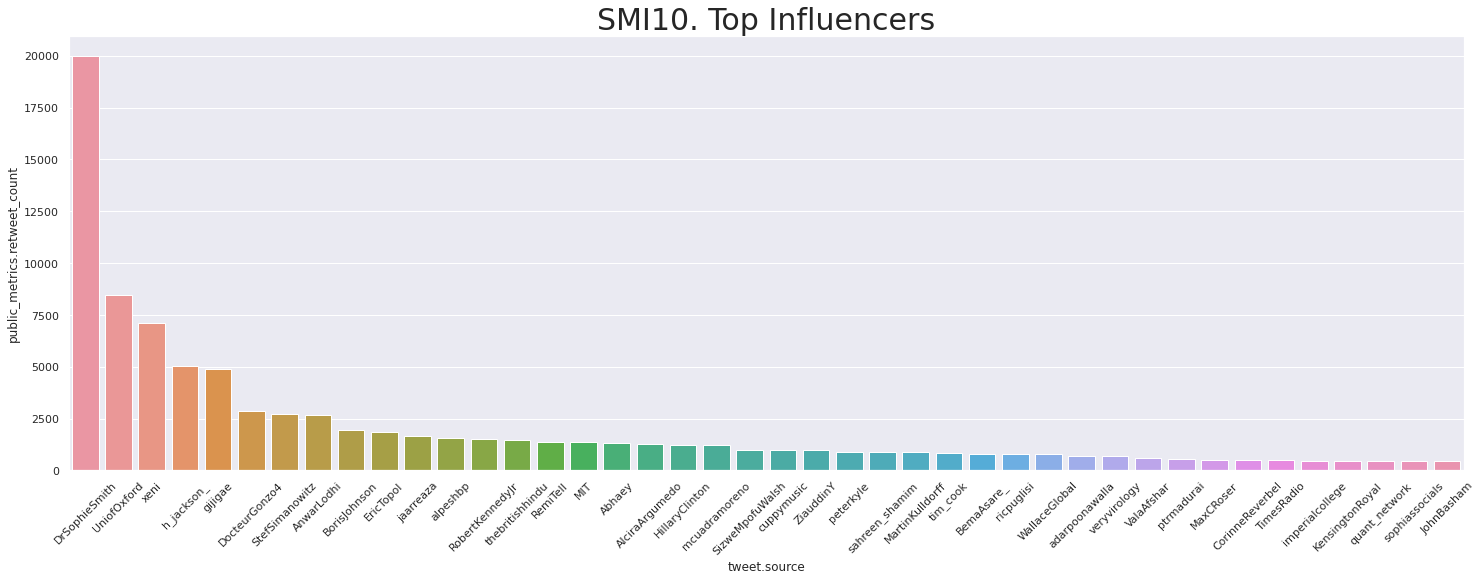

In [34]:
sns.barplot(data=SMI10Visualization,y='public_metrics.retweet_count',x='tweet.source').set_title("SMI10. Top Influencers",fontsize=30);
plt.xticks(rotation=45);

### SMI11: Location of Top influencers.
#### This metric relies on the location disclosed by influencers on their twitter profile.

In [35]:
# This is where you initialize the client with your own bearer token (replace the XXXXX with your own bearer token)
client = Twarc2(bearer_token=BearerToken)


lookup = client.user_lookup(users=SMI10Visualization['tweet.source'],usernames = True)
TopInfluencers=pd.DataFrame()
for page in lookup:
        
        result = expansions.flatten(page)
        TopInfluencers=pd.json_normalize(result)

Unexpected HTTP response: <Response [401]>


HTTPError: 401 Client Error: Unauthorized for url: https://api.twitter.com/2/users/by?tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cwithheld&usernames=DrSophieSmith%2CUniofOxford%2Cxeni%2Ch_jackson_%2Cgijigae%2CDocteurGonzo4%2CStefSimanowitz%2CAnwarLodhi%2CBorisJohnson%2CEricTopol%2Cjaarreaza%2Calpeshbp%2CRobertKennedyJr%2Cthebritishhindu%2CRemiTell%2CMIT%2CAbhaey%2CAlciraArgumedo%2CHillaryClinton%2Cmcuadramoreno%2CSizweMpofuWalsh%2Ccuppymusic%2CZiauddinY%2Cpeterkyle%2Csahreen_shamim%2CMartinKulldorff%2Ctim_cook%2CBemaAsare_%2Cricpuglisi%2CWallaceGlobal%2Cadarpoonawalla%2Cveryvirology%2CValaAfshar%2Cptrmadurai%2CMaxCRoser%2CCorinneReverbel%2CTimesRadio%2Cimperialcollege%2CKensingtonRoyal%2Cquant_network%2Csophiassocials%2CJohnBasham

In [ ]:
SMI11=TopInfluencers[['username','location']]

In [ ]:
SMI11

In [ ]:
### SMI12: Impact of Top influencers.
#### This metric relies on metrics computed by twitter

In [ ]:
SMI12=TopInfluencers[['username','public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count',]]

In [ ]:
SMI12